In [51]:
import numpy as np
import matplotlib.pyplot as plt

## Functions
# dx/dt = f(x,t)
def f(x,t):
    return x

# Euler step
# f - the function
# tn - the time to estimate at
# h - the timestep
# x0 - the initial condition

def euler_step(f, tn, h, x0):
    xn1 = x0 + h*f(x0, tn)
    return xn1


def rk4_step(f, tn, h, x0):
    k1 = h * f(x0, tn)
    k2 = h * f((x0+h/2), (tn+k1/2))
    k3 = h * f((x0+h/2), (tn+k2/2))
    k4 = h * f((x0+h), (tn+k3))
    xn1 = x0 + (k1+2*k2+2*k3+k4)/6
    return xn1


# solve to
def solve_to(f,x0,t1,t2,deltat_max, method):
    timesteps = int((t2-t1)/deltat_max)
    x = x0

    if method == 'euler':
        for step in range(timesteps):
            x = euler_step(f, step, deltat_max, x)
        return x
    elif method == 'rk4':
        for step in range(timesteps):
            x = rk4_step(f, step, deltat_max, x)
        return x


# solve the ode
def solve_ode(f,t,x0,deltat_max,method):

    x_series = [x0]
    x = x0

    for i in range(len(t)-1):
        
        x = solve_to(f,x,t[i],t[i+1],deltat_max, method)
        x_series.append(x)

    return x_series



In [61]:
# print(solve_to(f, 1, 0, 1, 0.0001))
# print(solve_to(f, 2.718, 1, 2, 0.0001))
# print(solve_to(f, 1, 2, 3, 0.0001))
print(solve_ode(f, [0,1,2], 1, 0.01, 'euler'))
print(solve_ode(f, [0,1,2], 1, 0.001, 'rk4'))

[1, 2.704813829421526, 7.316017851829933]
[1, 2.7177823942020134, 7.384866491382936]


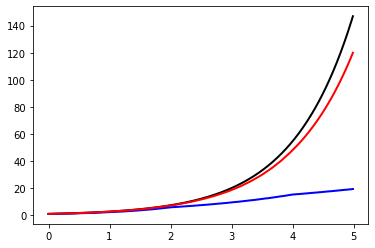

In [63]:
ax = plt.subplot()

t = np.arange(0.0, 5.0, 0.01)
s1 = np.exp(t)
s2 = solve_ode(f, t, 1, 0.01, 'euler')
s3 = solve_ode(f, t, 1, 0.001, 'rk4')

plt.plot(t, s1, lw=2,color="black")
plt.plot(t, s2, lw=2,color="blue")
plt.plot(t, s3, lw=2,color="red")
# plt.yscale('log')
plt.show()

In [1]:
def f(x,t):
    return x

LoadError: syntax: extra token "f" after end of expression

In [3]:
x = lambda a,b : f(a,b)
print(x(5, 3))

LoadError: syntax: extra token "a" after end of expression

In [7]:
vector = [1,2]

2-element Vector{Int64}:
 1
 2

In [8]:
U = [vector 2 3]

LoadError: DimensionMismatch("mismatch in dimension 1 (expected 2 got 1)")

In [5]:
yub = U[:, 1:end-1]

1×2 Matrix{Int64}:
 1  2

In [6]:
length(yub)

2

In [46]:
function f(u,t)
    g = u .- t
    return g
end

f (generic function with 1 method)

In [48]:
map((u,t) -> f(u, t), [[1 2]], 1)

1-element Vector{Matrix{Int64}}:
 [0 1]

In [38]:
u = [1 2; 3 4]

# println(typeof(u))

2×2 Matrix{Int64}:
 1  2
 3  4

In [65]:
u0 = [0.35 0.35]
T = 21
ehh = [u0 T]

1×3 Matrix{Float64}:
 0.35  0.35  21.0

In [66]:
ehh[:, 1:end .!= end]

1×2 Matrix{Float64}:
 0.35  0.35

solve_ode (generic function with 1 method)

In [79]:
function predprey(u, t)

    # println(u)

    if(!isapprox(length(u), 2.0; atol=eps(Float64), rtol=0))
        throw(error("Please make sure you have entered two initial conditions for the function."))
    end

    a = 1
    b = 0.2
    d = 0.1
    x = u[1]    
    y = u[2]
    
    x_dot = x.*(1-x)- (a.*x.*y)./(d + x)
    y_dot = b.*y.*(1 - (y./x))
    
    return [x_dot y_dot]
end

predprey (generic function with 1 method)

In [101]:
include("../ode_solver.jl")

x0 = 0
t = 0:0.1:2


t = 0:0.2:3
x0 = [1 1]
deltat_max = 0.01

s3 = solve_ode(predprey, x0, t, rk4_step, deltat_max)[:,1]

x_series: [1 1]
x1: [0.8350858229707269 0.996227091751152]
x2: [0.6956566758401999 0.9843025123908978]
x3: [0.5735694275906736 0.9631597846291109]
x4: [0.46440565350382934 0.9314751275339432]
x5: [0.3661385210667807 0.8876163963163592]
x6: [0.2785615181739073 0.8296688395068608]
x7: [0.20296084431227723 0.7557539804910239]
x8: [0.14152174742391865 0.6651493974259038]
x9: [0.09595313053643907 0.5608024312970398]
x10: [0.06567376714250123 0.4520490269591728]
x11: [0.04742683254886346 0.3525987649494247]
x12: [0.03707264149896863 0.2725057160422821]
x13: [0.03137332448462201 0.21346674339935434]
x14: [0.028361460142581413 0.17174027738444475]
x15: [0.026965442953753443 0.1424944253534293]


16-element Vector{Float64}:
 1.0
 0.8350858229707269
 0.6956566758401999
 0.5735694275906736
 0.46440565350382934
 0.3661385210667807
 0.2785615181739073
 0.20296084431227723
 0.14152174742391865
 0.09595313053643907
 0.06567376714250123
 0.04742683254886346
 0.03707264149896863
 0.03137332448462201
 0.028361460142581413
 0.026965442953753443

1×2 Matrix{Int64}:
 1  1